In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
notes = pd.read_csv('../../Data/notes_statistiques.txt')

notes.head()

,Notes examen de statistiques,Effectifs
0,0,0
1,1,0
2,2,2
3,3,0
4,4,1


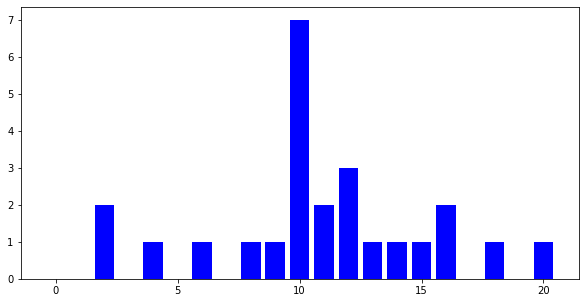

In [10]:
plt.figure(figsize=(10,5))

plt.bar(
    notes['Notes examen de statistiques'].values, 
    notes['Effectifs'].values, 
    color='b' 
);

In [11]:
notes = notes.rename(columns={'Notes examen de statistiques': 'Notes'})

In [13]:
notes.head()

,Notes,Effectifs
0,0,0
1,1,0
2,2,2
3,3,0
4,4,1


In [38]:
# notes['notes_bin']
# E, D, C, B, A

def attributeRange(d):
    if all( d['Notes'] >= 16 ):
        d['note_bins'] = "A"
    elif all( d['Notes'] >= 12 ):
        d['note_bins'] = "B"
        
    elif all( d['Notes'] >= 8 ):
        d['note_bins'] = "C"
        
    elif all( d['Notes'] >= 4 ):
        d['note_bins'] = "D"
    else :
        d['note_bins'] = "E"
    
    return d

notes = notes.groupby(['Notes']).apply(attributeRange)
notes

,Notes,Effectifs,note_bins
0,0,0,E
1,1,0,E
2,2,2,E
3,3,0,E
4,4,1,D
5,5,0,D
6,6,1,D
7,7,0,D
8,8,1,C
9,9,1,C


In [45]:
noteEffectifs = notes[['Effectifs', 'note_bins']].groupby(['note_bins']).aggregate(sum)

In [47]:
noteEffectifs

,Effectifs
note_bins,
A,4
B,6
C,11
D,2
E,2


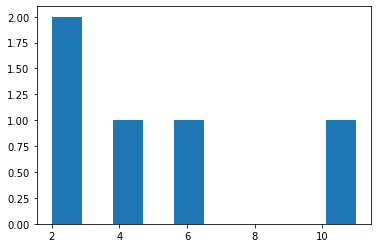

In [48]:
plt.hist(noteEffectifs.values);